In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
df3=sns.load_dataset('iris')
df3

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df3.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df3.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

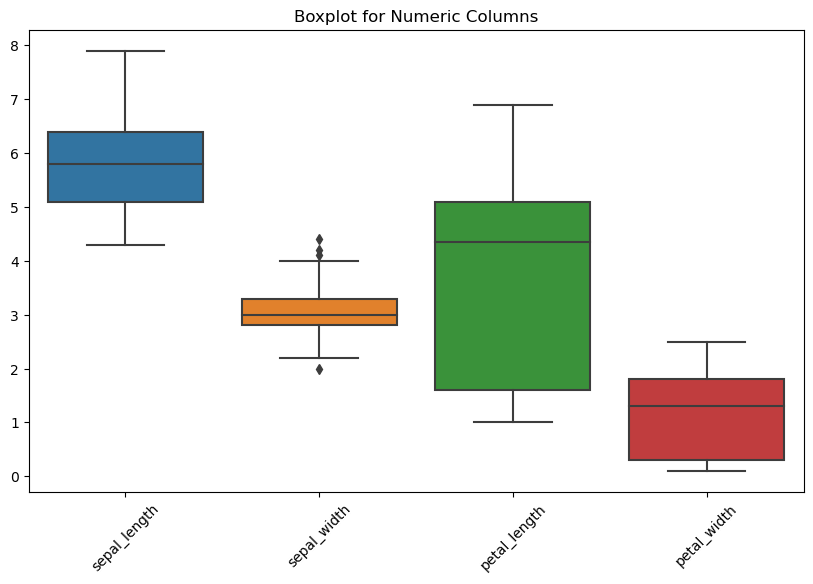

In [4]:
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3[numeric_cols])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [7]:
Q1 = df3[numeric_cols].quantile(0.25)
Q3 = df3[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (df3[numeric_cols] < lower_bound) | (df3[numeric_cols] > upper_bound)

df3_no_outliers = df3[~outlier_mask.any(axis=1)]

print("Dataset before outlier removal:", df3.shape)
print("Dataset after outlier removal:", df3_no_outliers.shape)

Dataset before outlier removal: (150, 5)
Dataset after outlier removal: (146, 5)


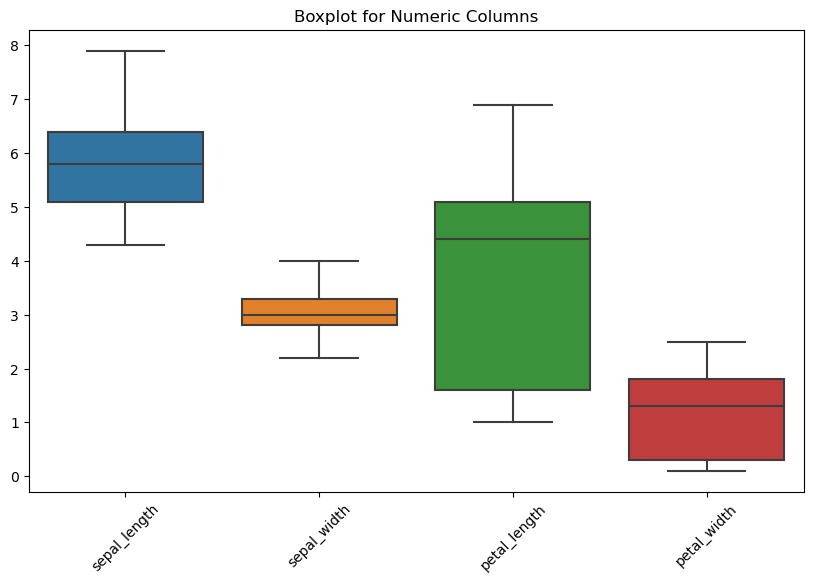

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3_no_outliers[numeric_cols])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [12]:
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

scaler = MinMaxScaler()
df3[numeric_cols] = scaler.fit_transform(df3[numeric_cols])
df3[numeric_cols].head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [12]:
setosa=df3[df3['species']=='setosa']
versicolor=df3[df3['species']=='versicolor']
virginica=df3[df3['species']=='virginica']

In [16]:
df3.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [17]:
df3.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [18]:
df3.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


In [20]:
df3.groupby('species').quantile(0.25)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.800,3.200,1.4,0.2
versicolor,5.600,2.525,4.0,1.2
virginica,6.225,2.800,5.1,1.8


In [21]:
df3.groupby('species').quantile(0.75)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.2,3.675,1.575,0.3
versicolor,6.3,3.000,4.600,1.5
virginica,6.9,3.175,5.875,2.3


In [26]:
df3.groupby('species').min()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.3,2.3,1.0,0.1
versicolor,4.9,2.0,3.0,1.0
virginica,4.9,2.2,4.5,1.4


In [27]:
df3.groupby('species').max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [23]:
setosa.mean(numeric_only=True)

sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
dtype: float64

In [24]:
setosa.median(numeric_only=True)

sepal_length    5.0
sepal_width     3.4
petal_length    1.5
petal_width     0.2
dtype: float64

In [25]:
setosa.std(numeric_only=True)

sepal_length    0.352490
sepal_width     0.379064
petal_length    0.173664
petal_width     0.105386
dtype: float64

In [29]:
virginica.std(numeric_only=True)

sepal_length    0.635880
sepal_width     0.322497
petal_length    0.551895
petal_width     0.274650
dtype: float64

In [30]:
virginica.mean(numeric_only=True)

sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
dtype: float64

In [31]:
virginica.median(numeric_only=True)

sepal_length    6.50
sepal_width     3.00
petal_length    5.55
petal_width     2.00
dtype: float64

In [32]:
versicolor.median(numeric_only=True)

sepal_length    5.90
sepal_width     2.80
petal_length    4.35
petal_width     1.30
dtype: float64

In [33]:
versicolor.mean(numeric_only=True)

sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64

In [34]:
versicolor.std(numeric_only=True)

sepal_length    0.516171
sepal_width     0.313798
petal_length    0.469911
petal_width     0.197753
dtype: float64